Chapter 03

# 二元OLS线性回归
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import yfinance as yf

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = False
p["xtick.minor.visible"] = False
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [3]:
y_X_df = yf.download(['AAPL','MCD','^GSPC'], start='2020-01-01', end='2020-12-31')
y_X_df.to_pickle('y_X_df.pkl')
y_X_df = y_X_df['Adj Close'].pct_change()
y_X_df.dropna(inplace = True)

[*********************100%%**********************]  3 of 3 completed


In [4]:
y_X_df.rename(columns={"^GSPC": "SP500"},inplace = True)
X_df = y_X_df[['AAPL','MCD']]
y_df = y_X_df[['SP500']]

## Data analysis

(-0.15, 0.15)

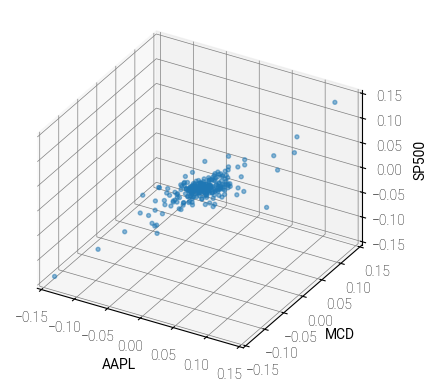

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_df["AAPL"], X_df["MCD"], y_df,
           s = 8, alpha = 0.5)

ax.set_xlabel('AAPL')
ax.set_ylabel('MCD')
ax.set_zlabel('SP500')
ax.set_proj_type('ortho')
ax.set_xlim([-0.15,0.15])
ax.set_ylim([-0.15,0.15])
ax.set_zlim([-0.15,0.15])

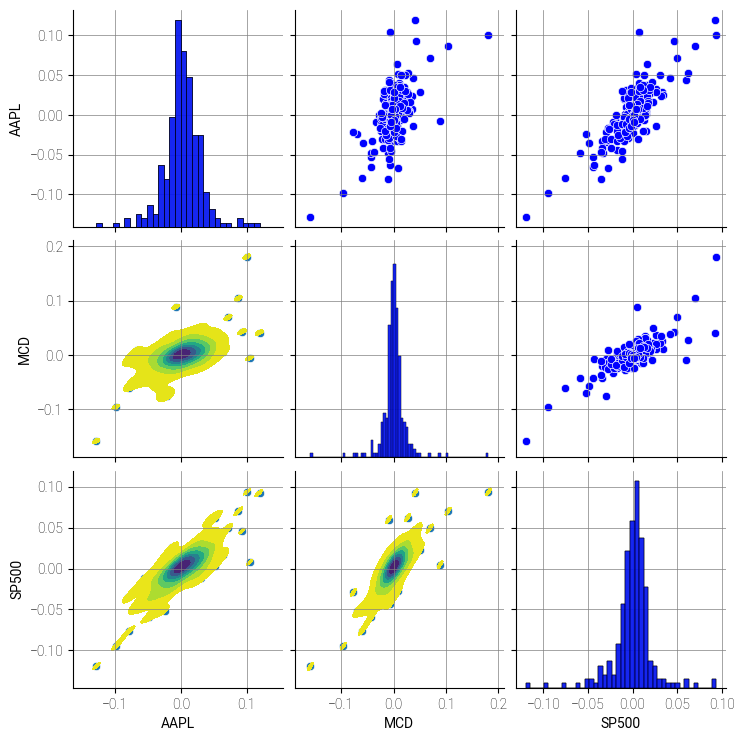

In [16]:
g = sns.pairplot(y_X_df)
g.map_upper(sns.scatterplot, color = 'b')
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="viridis_r") 
g.map_diag(sns.histplot, kde=False, color = 'b')

## covariance matrix

In [7]:
SIGMA = y_X_df.cov()

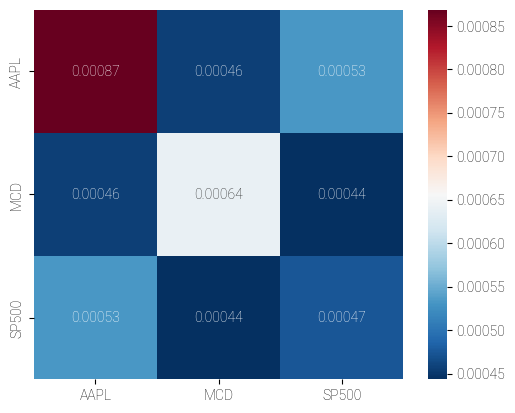

In [8]:
fig, axs = plt.subplots()

h = sns.heatmap(SIGMA, annot=True,cmap='RdBu_r')
h.set_aspect("equal")

## correlation matrix

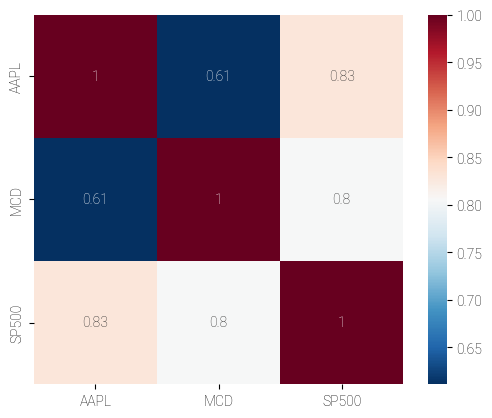

In [9]:
RHO = y_X_df.corr()

fig, axs = plt.subplots()

h = sns.heatmap(RHO, annot=True,cmap='RdBu_r')
h.set_aspect("equal")

## Volatility vector space

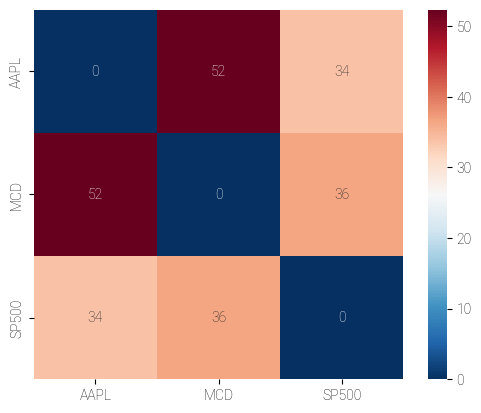

In [10]:
Angles = np.arccos(RHO)*180/np.pi
fig, axs = plt.subplots()

h = sns.heatmap(Angles, annot=True,cmap='RdBu_r')
h.set_aspect("equal")

## Regression

In [11]:
# add a column of ones
X_df = sm.add_constant(X_df)

In [12]:
model = sm.OLS(y_df, X_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.79e-96
Time:                        17:19:47   Log-Likelihood:                 827.38
No. Observations:                 251   AIC:                            -1649.
Df Residuals:                     248   BIC:                            -1638.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -1.012      0.3

In [13]:
p = model.fit().params
print(p)

const   -0.000579
AAPL     0.398361
MCD      0.408765
dtype: float64


In [14]:
# generate x-values for your regression line (two is sufficient)
xx1,xx2 = np.meshgrid(np.linspace(-0.15,0.15,20), np.linspace(-0.15,0.15,20))

yy = p.AAPL*xx1 + p.MCD*xx2 + p.const

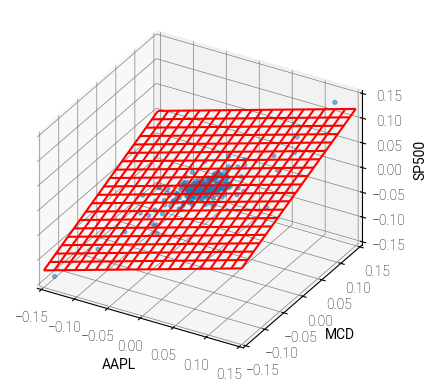

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_df["AAPL"], X_df["MCD"], y_df,
           s = 8, alpha = 0.5)
ax.plot_wireframe(xx1, xx2, yy, color = 'r')
ax.set_xlim([-0.15,0.15])
ax.set_ylim([-0.15,0.15])
ax.set_zlim([-0.15,0.15])
ax.set_xlabel('AAPL')
ax.set_ylabel('MCD')
ax.set_zlabel('SP500')
ax.set_proj_type('ortho')